# Image compression with K-means

- **Original Image Representation:**  In a typical 24-bit color image, each pixel's color is made from three 8-bit values representing red, green, and blue (RGB) intensity. Since each 8-bit value can range from 0 to 255, there are $256 \times 256 \times 256 = 16,777,216$ possible colors.
<br>

- **Goal:** We want to reduce the image's color palette to only 16 colors. By doing this, we can compress the image and represent it more efficiently.
<br>

- **How We'll Do it:** Instead of using 24 bits for each pixel (8 bits for each RGB channel), we'll use only 4 bits per pixel. Since $2^4 = 16$, we can represent 16 different color indices with 4 bits.
<br>

- **Using K-means Algorithm:** We'll apply the K-means algorithm to our image's pixels, treating them as points in a 3-dimensional RGB space. The goal is to find 16 cluster centers, which will become our new 16 colors.
    - **Initialization:** Select 16 initial colors (centroids).
    - **Assignment Step:** Assign each pixel to the nearest centroid in the RGB space.
    - **Update Step:** Recalculate the centroids as the mean of all pixels assigned to them.
    - **Repeat:** Repeat steps 2 and 3 until the centroids no longer change significantly.
<br><br>

- **After Finding the 16 Colors:** For each pixel in the original image, we'll replace its color with the nearest one from our 16 selected colors.
<br>

- **Result:** We've compressed the image by representing it with only 16 colors. Now, we only need to store the RGB values of these 16 colors and a 4-bit index for each pixel, dramatically reducing the file size.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import kmeans
from kmeans import kmeans_random_init, compute_centroids, find_closest_centroids, run_kmeans

## Load Image

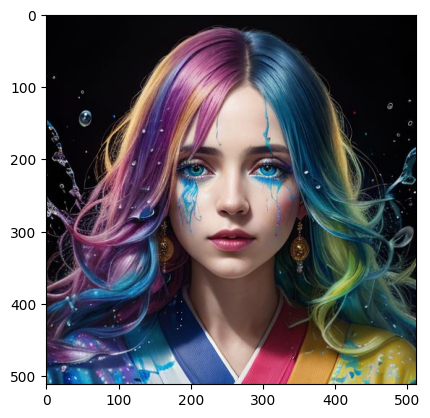

In [3]:
original_img = plt.imread('images/colorful.png')
plt.imshow(original_img)

In [4]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (512, 512, 3)


* the first two indices identify a pixel position, and
* the third index represents red, green, or blue. 

For example, `original_img[50, 33, 2]` gives the blue intensity of the pixel at row 50 and column 33.

## Process Image Data

To call `run_kmeans`, we need to first transform the matrix `original_img` into a two-dimensional matrix.

* The code below reshapes the matrix `original_img` to create an $m \times 3$ matrix of pixel colors (where
$m=262144 = 512\times512$)

*Note: To try this exercise on a JPG file, we first need to divide the pixel values by 255 so it will be in the range 0 to 1. This is not necessary for PNG files because it is already loaded in the required range (as mentioned in the [plt.imread() documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html)).*

In [5]:
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [6]:
print("Shape of reshaped image is:", X_img.shape)

Shape of reshaped image is: (262144, 3)


## Run K-Means on Image Pixels
Below, we run K-Means on the pre-processed image.

In [11]:
# Number of clusters
K = 16

# Randomly initialize k-means with K = 16
initial_centroids = kmeans_random_init(X_img, K)

# Run K-Means
centroids, idx = run_kmeans(X_img, initial_centroids, max_iters=10)

Iteration 1/10...
Iteration 2/10...
Iteration 3/10...
Iteration 4/10...
Iteration 5/10...
Iteration 6/10...
Iteration 7/10...
Iteration 8/10...
Iteration 9/10...
Iteration 10/10...


In [12]:
print("Shape of idx:", idx.shape)

Shape of idx: (262144,)


## Compress the Image
After finding the top $K=16$ colors to represent the image, we can now assign each pixel position to its closest centroid using the `find_closest_centroids` function. 
* This allows us to represent the original image using the centroid assignments of each pixel. 
* Notice that we have significantly reduced the number of bits that are required to describe the image. 
    * The original image required 24 bits (i.e. 8 bits x 3 channels in RGB encoding) for each one of the $512\times512$ pixel locations, resulting in total size of $512 \times 512 \times 24 = 6,291,456$ bits. 
    * The new representation requires some overhead storage in form of a dictionary of 16 colors, each of which require 24 bits, but the image itself then only requires 4 bits per pixel location. 
    * The final number of bits used is therefore $(16 \times 24) + (512 \times 512 \times 4) = 1,048,960$ bits, which corresponds to compressing the original image by about a factor of 6.

In [14]:
# Find the closest centroid of each pixel
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_compressed = centroids[idx, :]

# Reshape image into proper dimensions
X_compressed = np.reshape(X_compressed, original_img.shape)

## Compressed Image Result

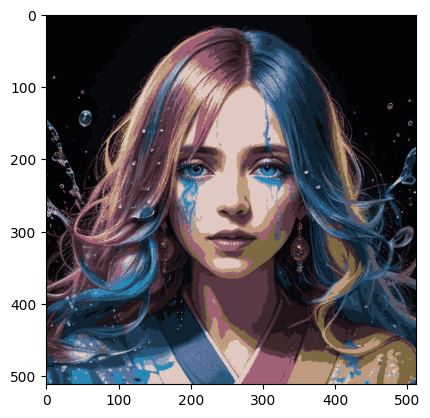

In [15]:
plt.imshow(X_compressed)

## Comparison

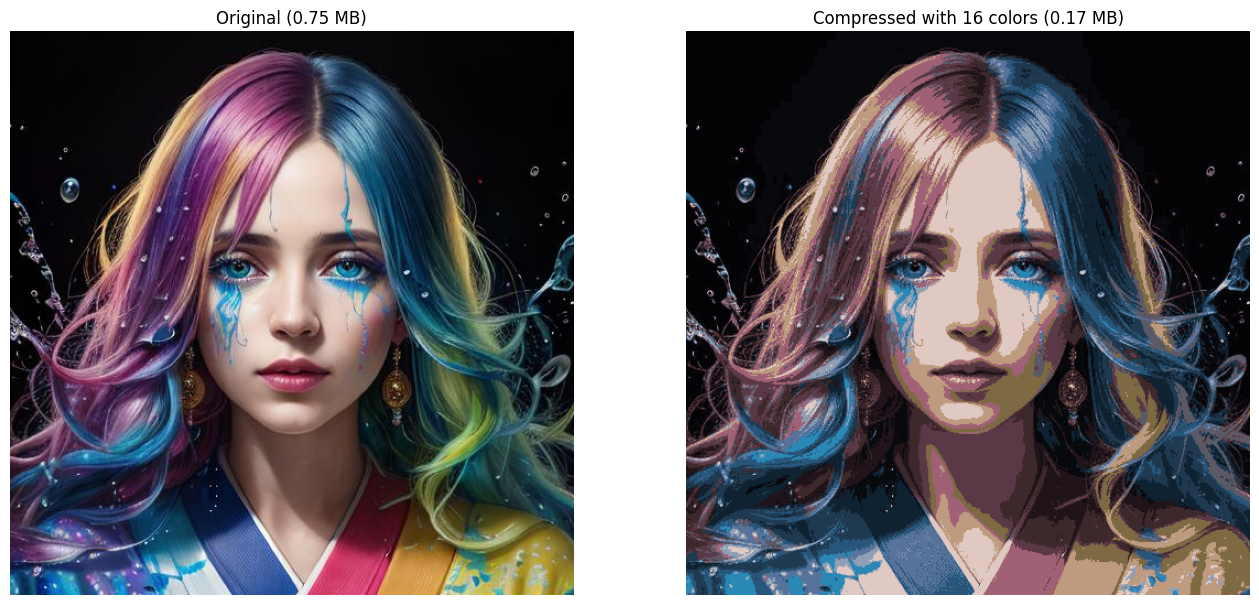

In [17]:
width, height = 512, 512

original_img_size = (width * height * 24) / 8 / 1024 / 1024
compressed_img_size = (width * height * (4 + 24/16)) / 8 / 1024 / 1024

fig, ax = plt.subplots(1,2, figsize=(16,16))

# Display original image
ax[0].imshow(original_img)
ax[0].set_title('Original (%.2f MB)' % original_img_size)
ax[0].set_axis_off()

# Display compressed image
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed with %d colors (%.2f MB)' % (K, compressed_img_size))
ax[1].set_axis_off()

plt.show()